In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Pick out data for last year until March, and March and April 2020.
crimes15 = pd.read_pickle("~/Documents/Data/Crimes_2015_to_March_2020.pkl")
crimesApril20 = pd.read_pickle("~/Documents/Data/Crimes_April_2020.pkl")

from datetime import datetime

In [2]:
# Lockdown started March 21. 
# Bars and restaurants were ordered closed starting on March 15. 
# Schools were ordered closed starting March 17.

# Data updated May 11, contains data except for the last 7 days.

In [3]:
common_crimes = crimesApril20["Primary Type"].value_counts()[crimesApril20["Primary Type"].value_counts() >= 150]
common_crimes = common_crimes.index
common_crimes = [c for c in common_crimes if c != "OTHER OFFENSE"]

In [4]:
crimesApril20 = crimesApril20[crimesApril20["Primary Type"].isin(common_crimes)]
crimes15 = crimes15[crimes15["Primary Type"].isin(common_crimes)]

In [5]:
# for each common crime, plot it each month.

In [6]:
# Pick out April 2019
crimes15 = crimes15[crimes15.DateTime >= datetime(2019,4,1)]
crimes15 = crimes15[crimes15.DateTime < datetime(2019,5,1)]


In [7]:
from sklearn.neighbors import KernelDensity

In [8]:
kde = KernelDensity(bandwidth=0.04, metric='haversine',
                        kernel = 'epanechnikov', algorithm='ball_tree')

In [9]:
Xtrain = crimes15
Xtrain = Xtrain[~Xtrain.Location.isnull()]
Xtrain = Xtrain[["Longitude","Latitude"]]
Xtrain = Xtrain[Xtrain.Latitude >= 40]
Xtrain = np.array(Xtrain)
kde.fit(Xtrain)

KernelDensity(algorithm='ball_tree', atol=0, bandwidth=0.04, breadth_first=True,
              kernel='epanechnikov', leaf_size=40, metric='haversine',
              metric_params=None, rtol=0)

In [10]:
# make grid.
minx = min(Xtrain[:,0])
maxx = max(Xtrain[:,0])
miny = min(Xtrain[:,1])
maxy = max(Xtrain[:,1])

x = np.linspace(minx, maxx)
y = np.linspace(miny, maxy)
xs, ys = np.meshgrid(x,y)

In [11]:
ys

array([[41.64703807, 41.64703807, 41.64703807, ..., 41.64703807,
        41.64703807, 41.64703807],
       [41.65470152, 41.65470152, 41.65470152, ..., 41.65470152,
        41.65470152, 41.65470152],
       [41.66236497, 41.66236497, 41.66236497, ..., 41.66236497,
        41.66236497, 41.66236497],
       ...,
       [42.00722029, 42.00722029, 42.00722029, ..., 42.00722029,
        42.00722029, 42.00722029],
       [42.01488374, 42.01488374, 42.01488374, ..., 42.01488374,
        42.01488374, 42.01488374],
       [42.02254719, 42.02254719, 42.02254719, ..., 42.02254719,
        42.02254719, 42.02254719]])

In [12]:
xy = np.vstack([xs.ravel(), ys.ravel()]).T


In [13]:
zs = []
i = 0
for ij in xy: 
    inp = ij.reshape(1,-1)
    #print(i)
    #i = i+1
    zs.append(kde.score_samples(inp))

In [14]:
zs = np.exp(zs)

zs = zs.reshape(xs.shape)

In [15]:
zs

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.21278638e-01, 5.85713531e-01, 4.81345728e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.12234776e-01, 6.80162067e-01, 5.69458109e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.33730463e-01, 8.17935323e-01, 6.85150177e-01],
       ...,
       [1.61770672e-01, 4.66461908e-01, 7.79284749e-01, ...,
        0.00000000e+00, 1.66825600e-13, 1.58948985e-13],
       [2.99887299e-02, 5.10686673e-02, 2.09656870e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.46779415e-13],
       [2.46568802e-02, 2.91070416e-02, 2.99368794e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

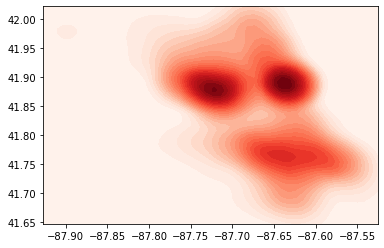

In [16]:
levels = np.linspace(0, zs.max(), 25)
plt.contourf(xs, ys, zs, levels=levels, cmap=plt.cm.Reds)

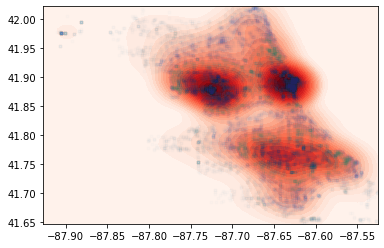

In [17]:

plt.contourf(xs, ys, zs, levels=levels, cmap=plt.cm.Reds)
plt.scatter(Xtrain[:,0],Xtrain[:,1],marker=".", alpha=0.01)

In [18]:
Xtest = crimesApril20
Xtest = Xtest[~Xtest.Location.isnull()]
Xtest = Xtest[["Longitude","Latitude"]]
Xtest = Xtest[Xtest.Latitude >= 40]
Xtest = np.array(Xtest)

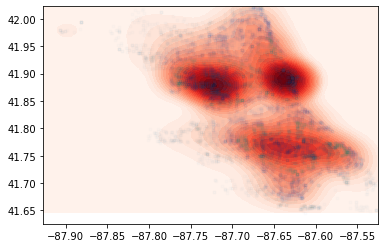

In [19]:
plt.contourf(xs, ys, zs, levels=levels, cmap=plt.cm.Reds)
plt.scatter(Xtest[:,0],Xtest[:,1],marker=".",alpha=0.01)

In [20]:
kde2 = KernelDensity(bandwidth=0.04, metric='haversine',
                        kernel = 'epanechnikov', algorithm='ball_tree')

In [21]:
kde2.fit(Xtest)

KernelDensity(algorithm='ball_tree', atol=0, bandwidth=0.04, breadth_first=True,
              kernel='epanechnikov', leaf_size=40, metric='haversine',
              metric_params=None, rtol=0)

In [22]:
zs2 = []
i = 0
for ij in xy: 
    inp = ij.reshape(1,-1)
    #print(i)
    i = i+1
    zs2.append(kde2.score_samples(inp))

In [23]:
zs2 = np.exp(zs2)

zs2 = zs2.reshape(xs.shape)

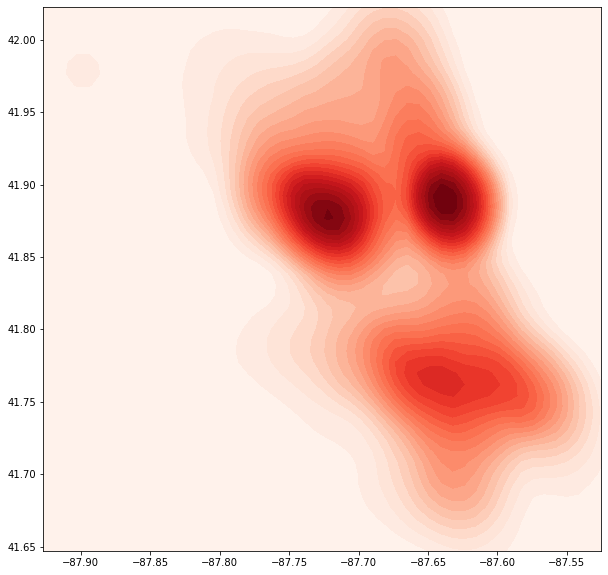

In [24]:
plt.figure(figsize=(10,10))
plt.contourf(xs, ys, zs, levels=levels, cmap=plt.cm.Reds)


plt.savefig("/home/thomas/Documents/Data/fig-before.png")

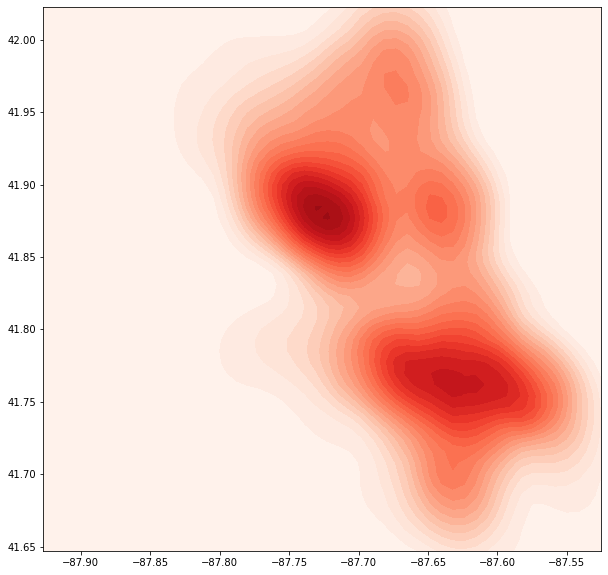

In [25]:
plt.figure(figsize=(10,10))

plt.contourf(xs, ys, zs2, levels=levels, cmap=plt.cm.Reds)

plt.savefig("/home/thomas/Documents/Data/fig-after.png")

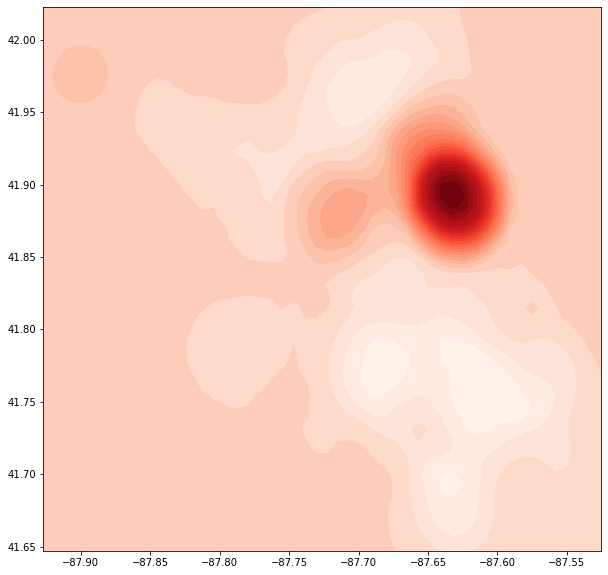

In [26]:
zz = zs-zs2
levels_diff = np.linspace(zz.min(), zz.max(), 25)


plt.figure(figsize=(10,10))
plt.contourf(xs,ys, zz, levels=levels_diff, cmap=plt.cm.Reds)
plt.savefig("/home/thomas/Documents/Data/fig-diff.png")

In [27]:
#import contextily as ctx

In [28]:
#im2, bbox = ctx.bounds2img(xs.min(), ys.min(), xs.max(), ys.max(), ll=True)


In [29]:
#fig, axs = plt.
#ax = plt.figure(figsize=(10,8))
#bx = ctx.plot_map(im2, bbox, title="Chicago")

In [30]:
#bx.axis